#**Implementasi Algoritma Random Forest Classifier untuk Prediksi Penderita Penyakit Jantung**

### **Informasi dataset:**

Dataset penyakit jantung ini merupakan hasil penggabungan dari lima dataset populer yang sebelumnya tersedia secara terpisah, yaitu:

1. **Cleveland**  
2. **Hungarian**  
3. **Switzerland**  
4. **Long Beach VA**  
5. **Statlog (Heart) Data Set**  

Dataset ini mencakup 1190 sampel dengan 11 fitur umum, merupakan dataset terbesar dalam penelitian penyakit jantung koroner (CAD). Tujuan utama penggabungan dataset ini adalah untuk mendukung pengembangan algoritma machine learning dan data mining terkait CAD, yang diharapkan dapat meningkatkan diagnosis klinis dan perawatan dini.

### Atribut Dataset
Dataset ini memiliki 11 fitur berikut:

1. **Umur (age)**: Usia dalam tahun (numerik).  
2. **Jenis kelamin (sex)**: 1 untuk pria, 0 untuk wanita (biner).  
3. **Tipe nyeri dada (chest pain type)**:
   - 1 = Angina tipikal.  
   - 2 = Angina atipikal.  
   - 3 = Nyeri non-anginal.  
   - 4 = Tanpa gejala.  
4. **Tekanan darah saat istirahat (resting bp s)**: Dalam mm Hg (numerik).  
5. **Kolesterol serum (cholesterol)**: Dalam mg/dl (numerik).  
6. **Gula darah puasa (fasting blood sugar)**:
   - 1 = Gula darah puasa > 120 mg/dl (benar).  
   - 0 = Gula darah puasa ≤ 120 mg/dl (salah) (biner).  
7. **Hasil elektrokardiogram saat istirahat (resting ecg)**:
   - 0 = Normal.  
   - 1 = Abnormalitas gelombang ST-T.  
   - 2 = Hipertrofi ventrikel kiri.  
8. **Detak jantung maksimum (max heart rate)**: Detak jantung maksimum yang tercapai (numerik).  
9. **Angina akibat olahraga (exercise angina)**:
   - 1 = Ya.  
   - 0 = Tidak (biner).  
10. **Oldpeak**: Depresi ST setelah olahraga (numerik).  
11. **Kemiringan segmen ST saat puncak olahraga (ST slope)**:
    - 1 = Menanjak.  
    - 2 = Datar.  
    - 3 = Menurun.  

### Target
Variabel target (class) menunjukkan keberadaan penyakit jantung:
- 1 = Menderita penyakit jantung.
- 0 = Normal (tidak menderita penyakit jantung).

### **Import Libraries**

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns

# data scaling
from sklearn.preprocessing import StandardScaler

# data spliting
from sklearn.model_selection import train_test_split

# oversampling
from imblearn.over_sampling import RandomOverSampler

# model prediksi (klasifikasi)
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import warnings
warnings.filterwarnings(action="ignore")

### **Read Dataset**

In [5]:
# Memuat data csv
df = pd.read_csv("heart_attack_dataset.csv")
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40.0,1.0,2.0,140.0,289,0.0,0.0,172.0,0,0.0,1.0,0
1,49.0,0.0,3.0,160.0,180,0.0,0.0,156.0,0,1.0,2.0,1
2,37.0,1.0,2.0,130.0,283,0.0,1.0,98.0,0,0.0,1.0,0
3,48.0,0.0,4.0,138.0,214,0.0,0.0,108.0,1,1.5,2.0,1
4,54.0,1.0,3.0,150.0,195,0.0,0.0,122.0,0,0.0,1.0,0


In [6]:
# jumlah baris dan atribut
df.shape

(1195, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1194 non-null   float64
 1   sex                  1194 non-null   float64
 2   chest pain type      1194 non-null   float64
 3   resting bp s         1194 non-null   float64
 4   cholesterol          1195 non-null   int64  
 5   fasting blood sugar  1194 non-null   float64
 6   resting ecg          1194 non-null   float64
 7   max heart rate       1194 non-null   float64
 8   exercise angina      1195 non-null   int64  
 9   oldpeak              1195 non-null   float64
 10  ST slope             1194 non-null   float64
 11  target               1195 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 112.2 KB


In [8]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1194.000000,1194.000000,1194.000000,1194.000000,1195.000000,1194.00000,1194.000000,1194.000000,1195.000000,1195.000000,1194.000000,1195.000000
mean,53.692630,0.762982,3.231993,132.163317,210.526360,0.21273,0.695980,139.777219,0.385774,0.921004,1.624791,0.529707
std,9.358564,0.425432,0.934905,18.368427,101.291964,0.40941,0.869836,25.492216,0.486981,1.084790,0.609994,0.499326
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.00000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.00000,0.000000,141.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,270.000000,0.00000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.00000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


### **Cleaning Dataset**

#### Menghapus missing values:

In [9]:
# cek missing values
df.isna().sum()

,0
age,1
sex,1
chest pain type,1
resting bp s,1
cholesterol,0
fasting blood sugar,1
resting ecg,1
max heart rate,1
exercise angina,0
oldpeak,0


In [10]:
# Menampilkan baris dengan missing values
missing_rows = df[df.isnull().any(axis=1)]
print("Baris dengan missing values:")
missing_rows

Baris dengan missing values:


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1192,NaN,1.0,2.0,130.0,300,0.0,0.0,140.0,0,0.0,1.0,0
1193,45.0,NaN,3.0,140.0,280,NaN,0.0,NaN,0,1.0,2.0,1
1194,50.0,0.0,NaN,NaN,290,0.0,NaN,150.0,0,0.5,NaN,1


In [11]:
# Menghapus missing values
df = df.dropna()

#### Menghapus duplikasi:

In [12]:
# cek data duplikat
df.duplicated().sum()

274

Terdapat 274 baris data yang terduplikat di dalam dataset. Karena dataset ini tidak memiliki kolom identifikasi unik (seperti ID pasien), tidak dapat dipastikan apakah data yang terduplikat ini berasal dari pasien berbeda yang secara kebetulan memiliki data yang identik, atau karena adanya kesalahan input.

Untuk memastikan keakuratan dan menghindari bias dalam pelatihan model, data duplikat akan dihapus dalam eksperimen ini. Hal ini dilakukan agar setiap baris dalam dataset merepresentasikan data yang unik dan tidak memberikan bobot lebih pada pola tertentu yang berulang.

In [13]:
# Menghapus duplikasi
df = df.drop_duplicates()
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40.0,1.0,2.0,140.0,289,0.0,0.0,172.0,0,0.0,1.0,0
1,49.0,0.0,3.0,160.0,180,0.0,0.0,156.0,0,1.0,2.0,1
2,37.0,1.0,2.0,130.0,283,0.0,1.0,98.0,0,0.0,1.0,0
3,48.0,0.0,4.0,138.0,214,0.0,0.0,108.0,1,1.5,2.0,1
4,54.0,1.0,3.0,150.0,195,0.0,0.0,122.0,0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45.0,1.0,1.0,110.0,264,0.0,0.0,132.0,0,1.2,2.0,1
1186,68.0,1.0,4.0,144.0,193,1.0,0.0,141.0,0,3.4,2.0,1
1187,57.0,1.0,4.0,130.0,131,0.0,0.0,115.0,1,1.2,2.0,1
1188,57.0,0.0,2.0,130.0,236,0.0,2.0,174.0,0,0.0,2.0,1


#### Menghapus Outliers:

In [14]:
# Menghapus outliers
for i in ['cholesterol', 'resting bp s']:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1

    min_val = q1 - (1.5 * iqr)
    max_val = q3 + (1.5 * iqr)

    df = df[(df[i] >= min_val) & (df[i] <= max_val)]

## **Exploratory Data Analysis**

#### Distribusi kelas target:

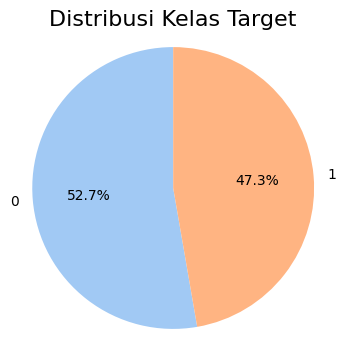

In [15]:
# Menghitung distribusi kelas target
target_counts = df['target'].value_counts()
labels = target_counts.index
sizes = target_counts.values

# Membuat pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribusi Kelas Target', fontsize=16)
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran sempurna
plt.show()

Distribusi ini menunjukkan bahwa ada hampir setengah dari pasien yang diagnosis memiliki penyakit jantung (kelas 1). Kita dapat melihat bahwa data target cukup seimbang antara dua kelas.

#### Analisis variabel kategorikal:

<Axes: title={'center': 'Variable ST slope'}, xlabel='ST slope', ylabel='count'>

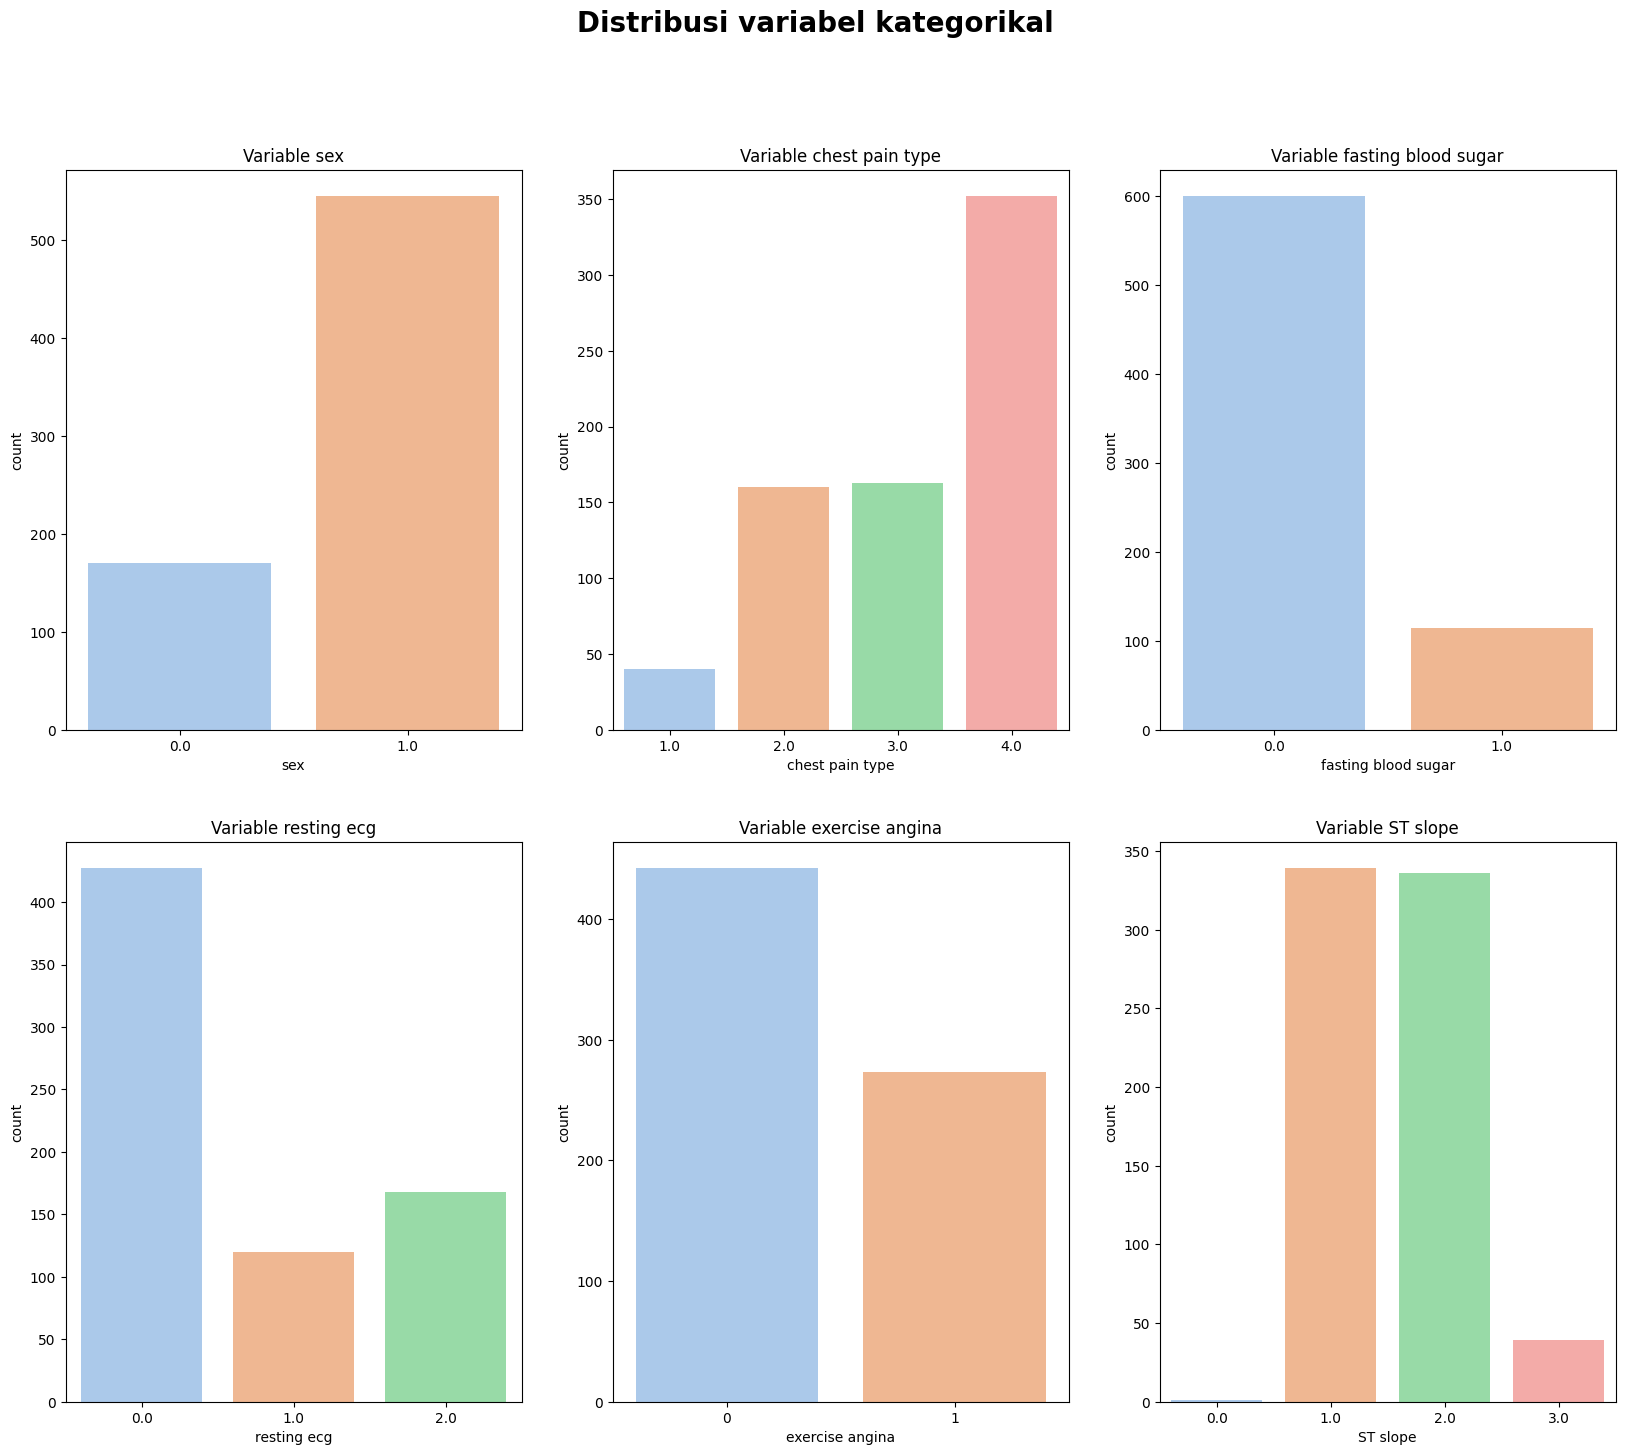

In [16]:
plt.figure(figsize = (20, 16))
plt.suptitle("Distribusi variabel kategorikal",fontweight="bold", fontsize=20)

plt.subplot(2, 3, 1)
plt.gca().set_title('Variable sex')
sns.countplot(x = 'sex', palette = 'pastel', data = df)

plt.subplot(2, 3, 2)
plt.gca().set_title('Variable chest pain type')
sns.countplot(x = 'chest pain type', palette = 'pastel', data = df)

plt.subplot(2, 3, 3)
plt.gca().set_title('Variable fasting blood sugar')
sns.countplot(x = 'fasting blood sugar', palette = 'pastel', data = df)

plt.subplot(2, 3, 4)
plt.gca().set_title('Variable resting ecg')
sns.countplot(x = 'resting ecg', palette = 'pastel', data = df)

plt.subplot(2, 3, 5)
plt.gca().set_title('Variable exercise angina')
sns.countplot(x = 'exercise angina', palette = 'pastel', data = df)

plt.subplot(2, 3, 6)
plt.gca().set_title('Variable ST slope')
sns.countplot(x = 'ST slope', palette = 'pastel', data = df)

Grafik-grafik ini menunjukkan distribusi variabel kategori dalam dataset.

1. **Variabel `sex`**:
   - Dataset ini memiliki lebih banyak sampel laki-laki (kode `1`) dibandingkan perempuan (kode `0`).
   
2. **Variabel `chest pain type` (Jenis Nyeri Dada)**:
   - Sebagian besar sampel menunjukkan tipe nyeri dada `4`, yang sering kali diidentifikasi sebagai **asimptomatik** (tidak menunjukkan gejala).

3. **Variabel `fasting blood sugar` (Gula Darah Puasa)**:
   - Mayoritas individu dalam dataset memiliki kadar gula darah puasa di bawah 120 mg/dL (kode `0`), dengan hanya sedikit yang melebihi batas ini (kode `1`).

4. **Variabel `resting ecg` (Elektrokardiografi Istirahat)**:
   - Sebagian besar sampel menunjukkan hasil EKG normal (kode `0`), dengan beberapa menunjukkan kelainan seperti **gelombang ST-T abnormal** (kode `1`) atau **hipertrofi ventrikel kiri** (kode `2`).

5. **Variabel `exercise angina` (Angina Saat Berolahraga)**:
   - Mayoritas individu tidak mengalami angina saat berolahraga (kode `0`), tetapi ada sejumlah signifikan yang mengalaminya (kode `1`).

6. **Variabel `ST slope` (Kemiringan Segmen ST)**:
   - Distribusi merata antara kategori `1` (upsloping) dan `2` (flat), dengan jumlah kecil kategori `3` (downsloping).

<Axes: title={'center': 'Variable ST slope'}, xlabel='ST slope', ylabel='count'>

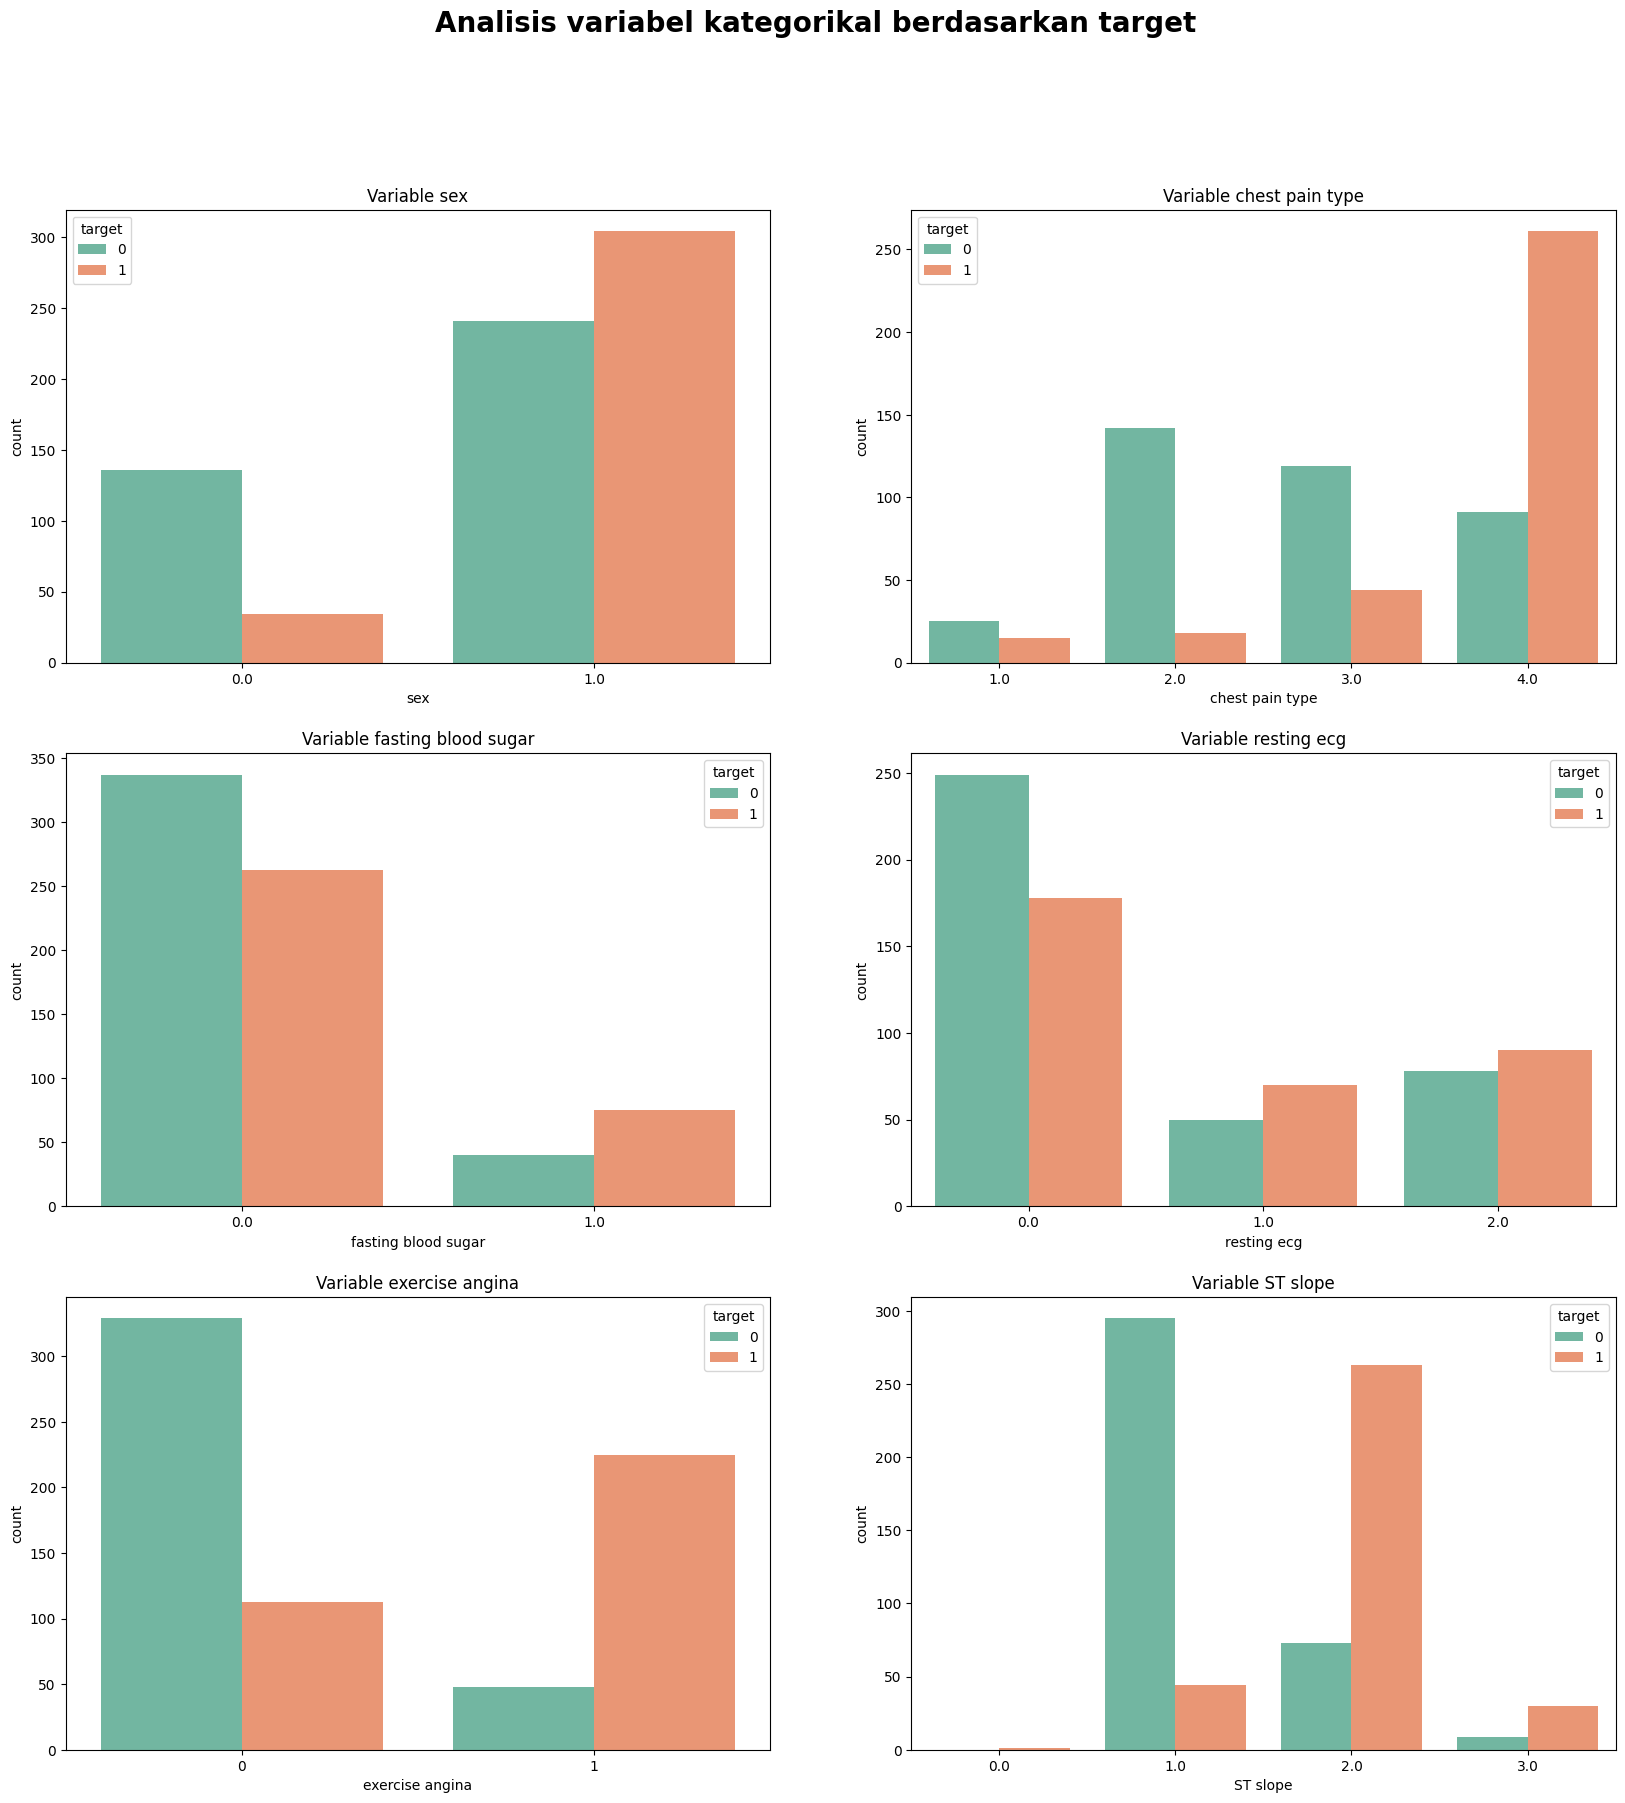

In [36]:
plt.figure(figsize = (20, 20))
plt.suptitle("Analisis variabel kategorikal berdasarkan target", fontweight="bold", fontsize=20)

plt.subplot(3, 2, 1)
plt.gca().set_title('Variable sex')
sns.countplot(x = 'sex', hue = 'target', palette = 'Set2', data = df)

plt.subplot(3, 2, 2)
plt.gca().set_title('Variable chest pain type')
sns.countplot(x = 'chest pain type', hue = 'target', palette = 'Set2', data = df)

plt.subplot(3, 2, 3)
plt.gca().set_title('Variable fasting blood sugar')
sns.countplot(x = 'fasting blood sugar', hue = 'target', palette = 'Set2', data = df)

plt.subplot(3, 2, 4)
plt.gca().set_title('Variable resting ecg')
sns.countplot(x = 'resting ecg', hue = 'target', palette = 'Set2', data = df)

plt.subplot(3, 2, 5)
plt.gca().set_title('Variable exercise angina')
sns.countplot(x = 'exercise angina', hue = 'target', palette = 'Set2', data = df)

plt.subplot(3, 2, 6)
plt.gca().set_title('Variable ST slope')
sns.countplot(x = 'ST slope', hue = 'target', palette = 'Set2', data = df)

Berikut adalah analisis terhadap grafik variabel kategorikal berdasarkan target (variabel target = 0 berarti tidak memiliki penyakit jantung, target = 1 berarti memiliki penyakit jantung):

**1. Variable Sex**
- **Laki-laki (1)**: Lebih banyak yang terdiagnosis dengan penyakit jantung (target = 1) dibandingkan yang tidak (target = 0). Ini menunjukkan laki-laki memiliki risiko lebih tinggi terkena penyakit jantung.
- **Perempuan (0)**: Sebagian besar tidak memiliki penyakit jantung (target = 0). Hal ini menunjukkan risiko perempuan lebih rendah dibandingkan laki-laki.

---

**2. Variable Chest Pain Type**
- **Tipe 4 (angina non-tipikal)**: Didominasi oleh pasien dengan target = 1 (memiliki penyakit jantung). Ini menunjukkan tipe nyeri dada ini memiliki hubungan kuat dengan penyakit jantung.
- **Tipe 3 dan 2**: Didominasi oleh pasien dengan target = 0, menunjukkan tipe ini lebih jarang terkait dengan penyakit jantung.
- **Tipe 1**: Memiliki distribusi yang relatif seimbang antara target = 0 dan target = 1.

---

**3. Variable Fasting Blood Sugar (FBS)**
- **FBS < 120 mg/dL (0)**: Sebagian besar pasien termasuk dalam kategori ini, baik untuk target = 0 maupun target = 1. Namun, pasien tanpa penyakit jantung (target = 0) lebih dominan.
- **FBS ≥ 120 mg/dL (1)**: Proporsi pasien dengan target = 1 lebih tinggi dibandingkan target = 0, meskipun jumlahnya lebih sedikit. Ini menunjukkan kadar gula darah puasa tinggi mungkin meningkatkan risiko penyakit jantung.

---

**4. Variable Resting ECG**
- **Kategori 0**: Sebagian besar pasien berada dalam kategori ini, didominasi oleh pasien tanpa penyakit jantung (target = 0).
- **Kategori 1 dan 2**: Lebih banyak pasien dengan target = 1 (memiliki penyakit jantung) pada kategori ini, meskipun distribusi total lebih kecil dibandingkan kategori 0.

---

**5. Variable Exercise Angina**
- **Tidak ada angina selama olahraga (0)**: Sebagian besar pasien dalam kategori ini tidak memiliki penyakit jantung (target = 0).
- **Ada angina selama olahraga (1)**: Sebagian besar pasien dalam kategori ini memiliki penyakit jantung (target = 1). Ini menunjukkan bahwa angina yang dipicu oleh olahraga merupakan indikator kuat risiko penyakit jantung.

---

**6. Variable ST Slope**
- **Kategori 1 (upsloping)**: Didominasi oleh pasien tanpa penyakit jantung (target = 0).
- **Kategori 2 (flat)**: Sebagian besar pasien memiliki penyakit jantung (target = 1). Ini menunjukkan hubungan kuat antara kemiringan segmen ST flat dengan risiko penyakit jantung.
- **Kategori 3 (downsloping)**: Proporsi pasien dengan target = 1 (penyakit jantung) lebih tinggi dibandingkan target = 0.

#### Analisis variabel numerik:

<Axes: xlabel='oldpeak', ylabel='Count'>

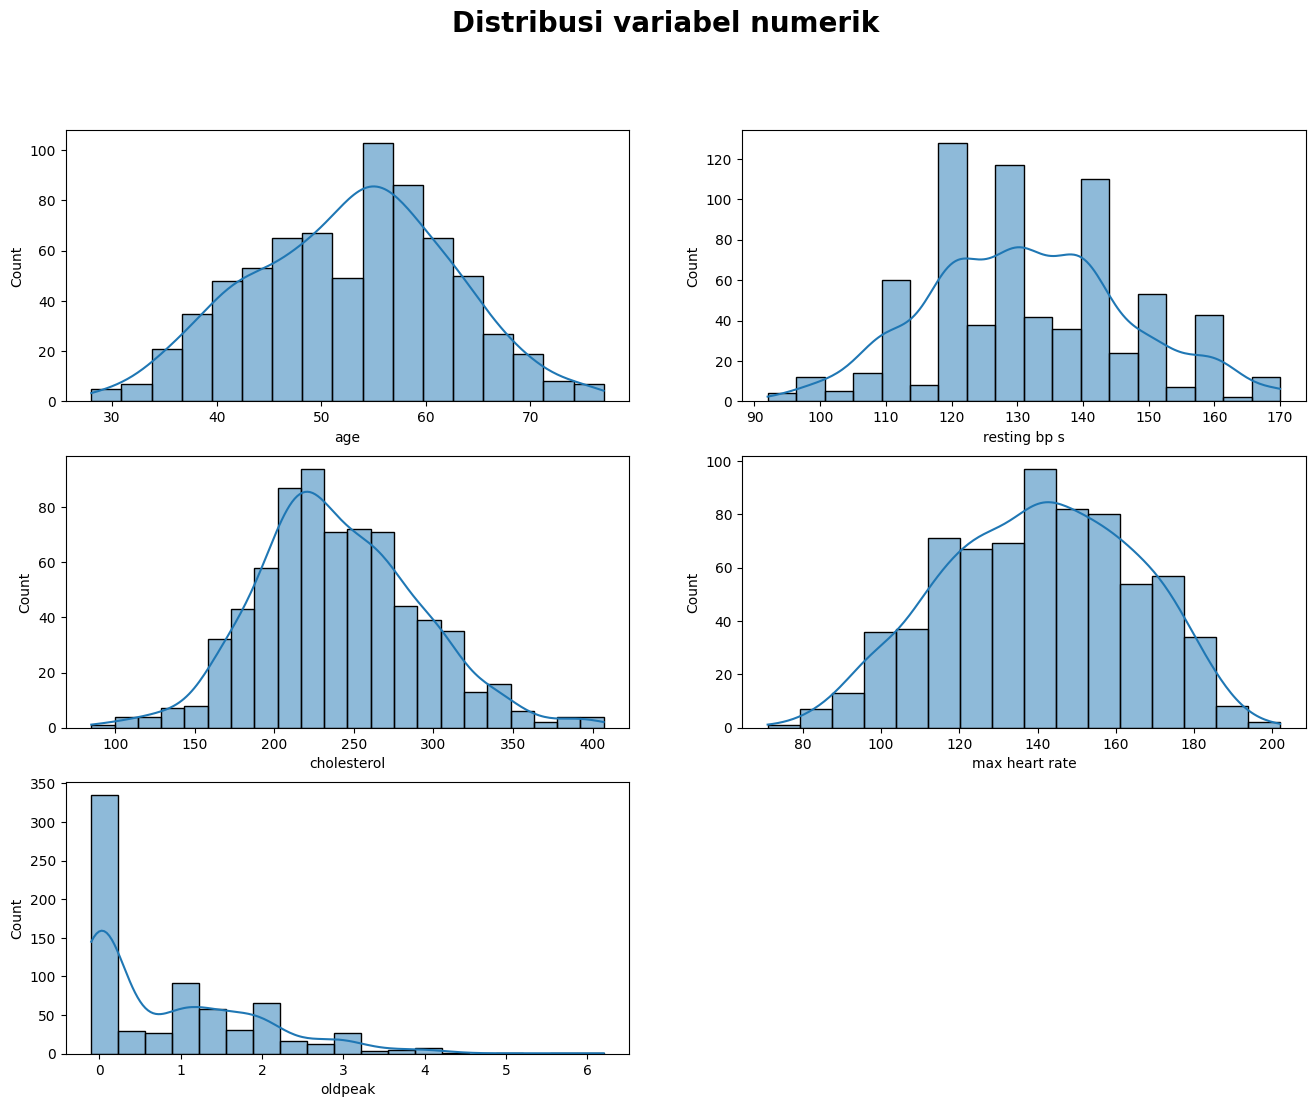

In [43]:
plt.figure(figsize = (16, 12))
plt.suptitle("Distribusi variabel numerik", fontweight="bold", fontsize=20)

plt.subplot(3, 2, 1)
sns.histplot(x = df['age'], kde = True, palette='pastel')

plt.subplot(3, 2, 2)
sns.histplot(x = df['resting bp s'], kde = True, palette='pastel')

plt.subplot(3, 2, 3)
sns.histplot(x = df['cholesterol'], kde = True, palette='pastel')

plt.subplot(3, 2, 4)
sns.histplot(x = df['max heart rate'], kde = True, palette='pastel')

plt.subplot(3, 2, 5)
sns.histplot(x = df['oldpeak'], kde = True, palette='pastel')

Berikut adalah analisis dari distribusi variabel numerik berdasarkan grafik:

**1. Age (Usia):**
- Sebagian besar pasien berada dalam rentang usia **40-70 tahun**, dengan sangat sedikit pasien di bawah 40 tahun atau di atas 70 tahun.

**2. Resting BP S (Tekanan Darah Saat Istirahat)**
- Distribusi tekanan darah saat istirahat cenderung **menyebar** dengan puncak di sekitar nilai **120-140 mmHg**.

**3. Cholesterol (Kolesterol)**
- Distribusi kolesterol cenderung **menyebar** dengan puncak di sekitar nilai **200-250 mg/dL**.

**4. Max Heart Rate (Denyut Jantung Maksimal)**
- Distribusi denyut jantung cenderung **menyebar** dengan puncak di sekitar nilai **130-160 bpm**.

**5. Oldpeak**
-  Nilai oldpeak rendah (0-1) lebih sering ditemukan, menunjukkan kurangnya depresi segmen ST pada sebagian besar pasien.

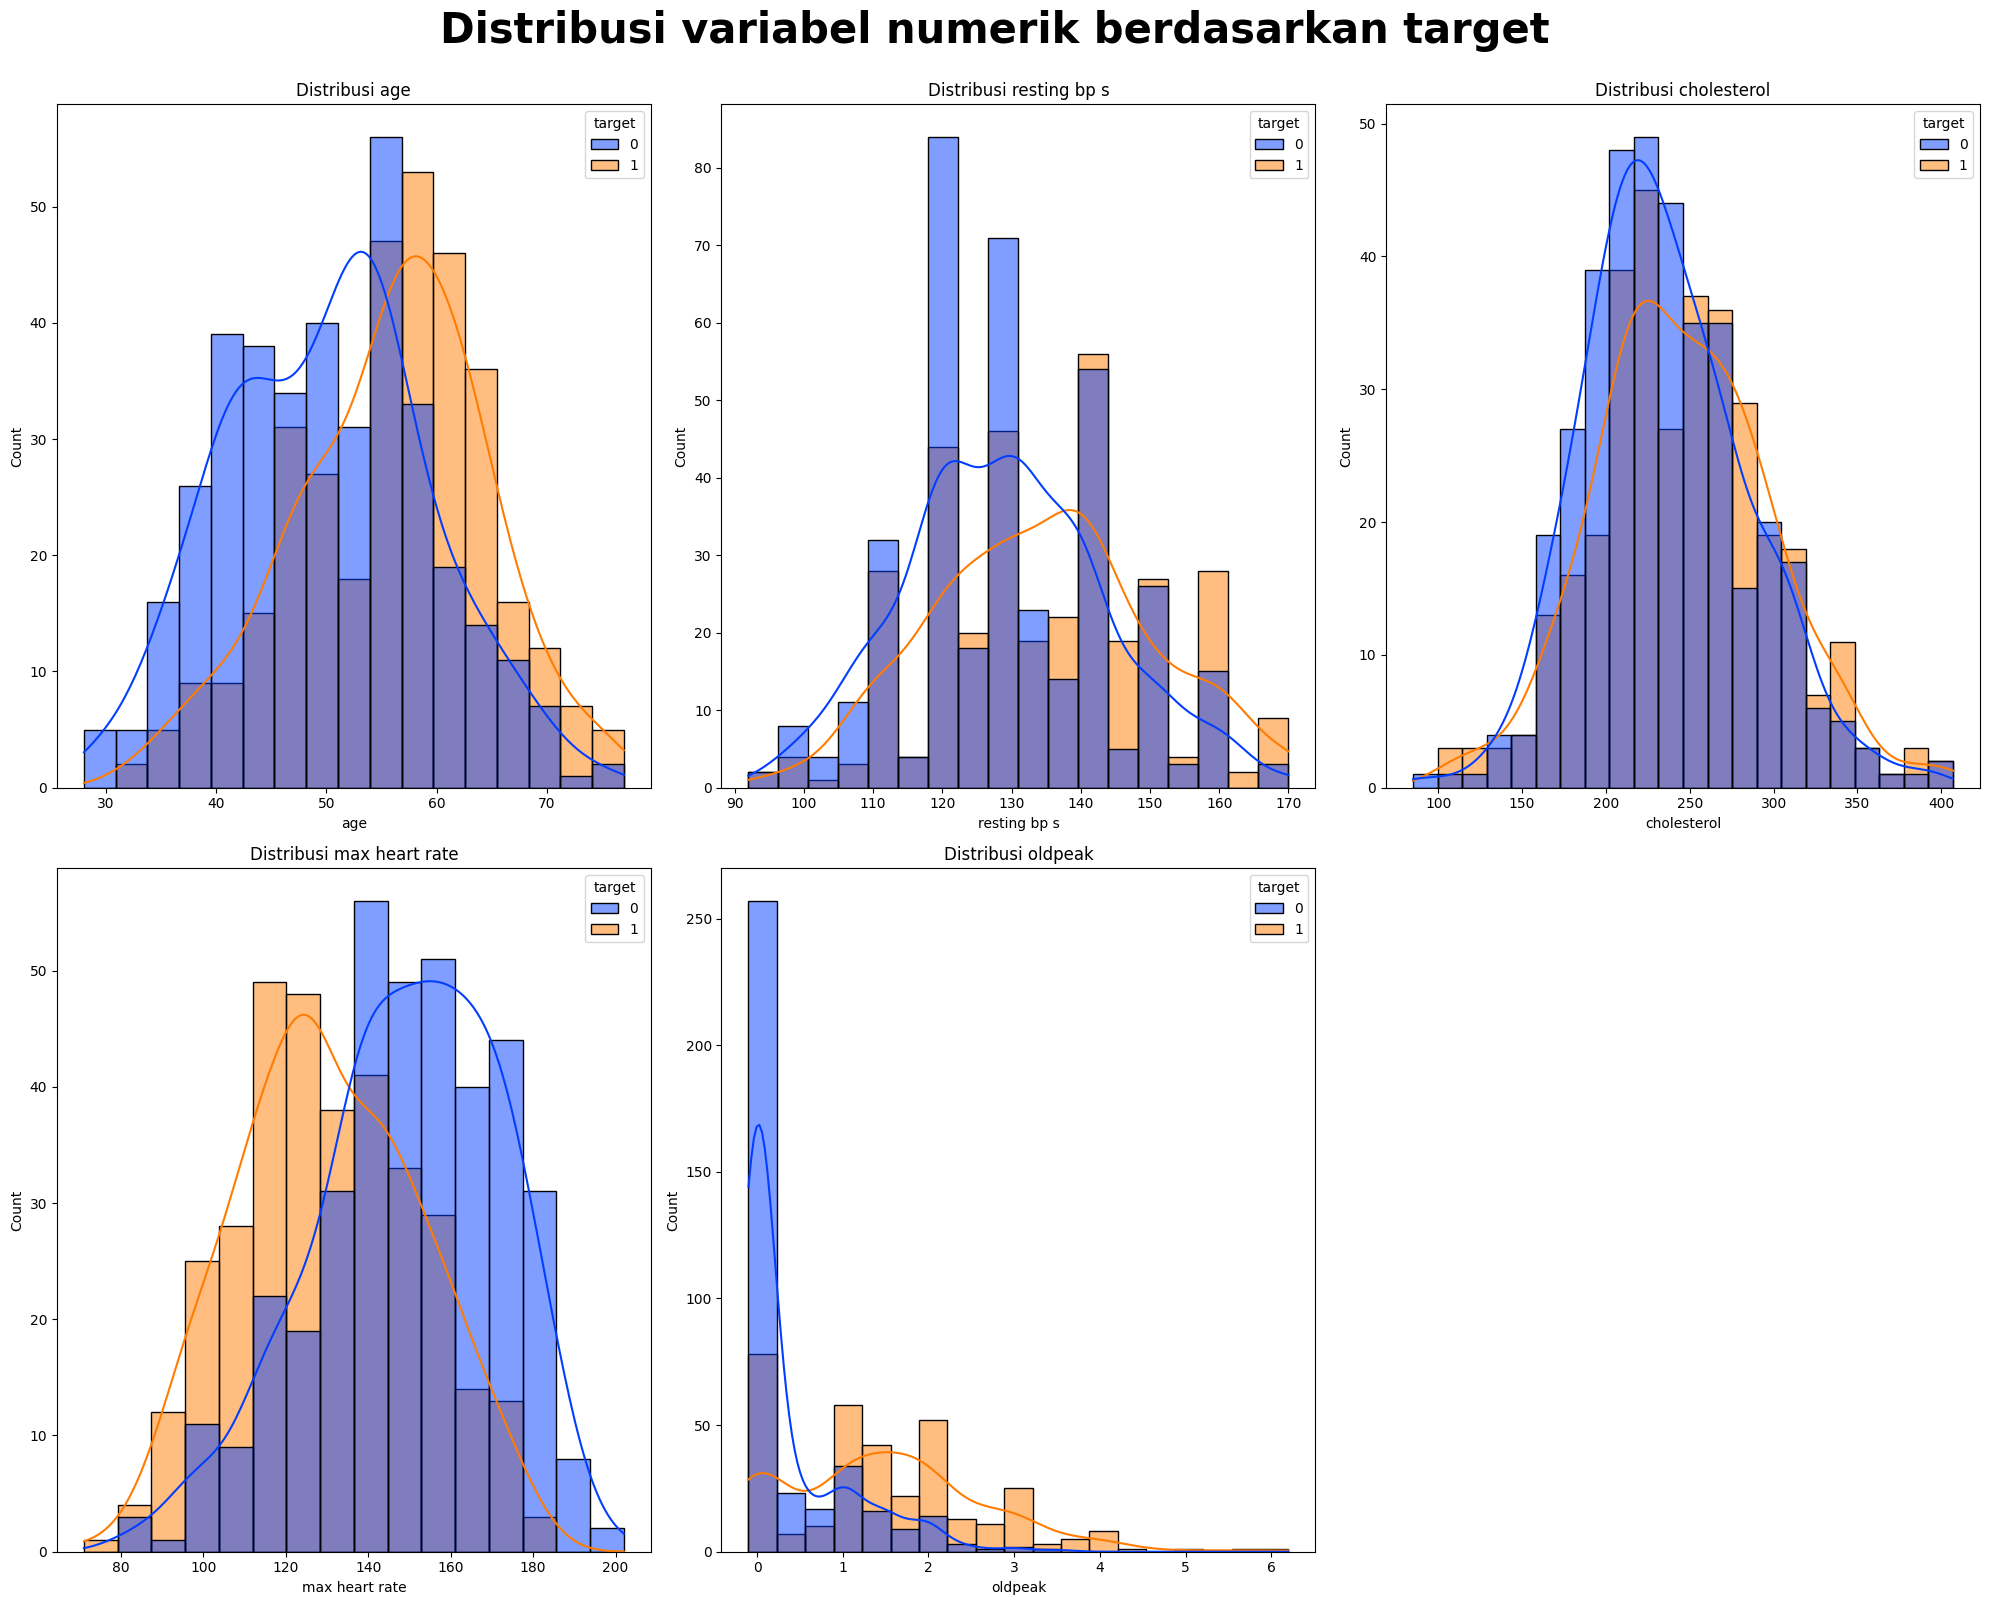

In [38]:
plt.figure(figsize=(20, 16))
plt.suptitle("Distribusi variabel numerik berdasarkan target", fontweight="bold", fontsize=30, y=1)

plt.subplot(2, 3, 1)
plt.gca().set_title('Distribusi age')
sns.histplot(data=df, x='age', hue='target', kde=True, palette='bright')
plt.xlabel('age')

plt.subplot(2, 3, 2)
plt.gca().set_title('Distribusi resting bp s')
sns.histplot(data=df, x='resting bp s', hue='target', kde=True, palette='bright')
plt.xlabel('resting bp s')

plt.subplot(2, 3, 3)
plt.gca().set_title('Distribusi cholesterol')
sns.histplot(data=df, x='cholesterol', hue='target', kde=True, palette='bright')
plt.xlabel('cholesterol')

plt.subplot(2, 3, 4)
plt.gca().set_title('Distribusi max heart rate')
sns.histplot(data=df, x='max heart rate', hue='target', kde=True, palette='bright')
plt.xlabel('max heart rate')

plt.subplot(2, 3, 5)
plt.gca().set_title('Distribusi oldpeak')
sns.histplot(data=df, x='oldpeak', hue='target', kde=True, palette='bright')
plt.xlabel('oldpeak')

plt.tight_layout()
plt.show()


**1. Age (Usia)**
- **Distribusi target 1** (memiliki penyakit jantung) Lebih banyak ditemukan pada kelompok usia **lebih tua** (diatas 55 tahun).
- **Distribusi target 0** (normal): Cenderung lebih banyak pada usia **dibawah 55 tahun**.
- Usia tua (diatas 55 tahun) lebih rentan terhadap penyakit jantung dibandingkan kelompok usia yang lebih tua.

---

**2. Resting BP S (Tekanan Darah Saat Istirahat)**
- Distribusi tekanan darah untuk target 0 dan 1 relatif **mirip**, dengan mayoritas pasien penderita penyakit jantung (1) berada dalam rentang **diatas 120 mmHg**.

---

**3. Cholesterol (Kolesterol)**
- **Distribusi target 1** mirip dengan target 0, tetapi sedikit lebih banyak pasien dengan target 1 memiliki kolesterol tinggi (>250 mg/dL).

---

**4. Max Heart Rate (Denyut Jantung Maksimal)**
- **Distribusi target 1** lebih banyak ditemukan pada pasien dengan nilai denyut jantung maksimal **lebih rendah** (dibawah 140 bpm).
- Pasien dengan denyut jantung maksimal lebih rendah cenderung memiliki penyakit jantung.

---

**5. Oldpeak**
- **Distribusi target 1** lebih banyak ditemukan pada pasien dengan nilai oldpeak yang **lebih tinggi** (>1).

#### Korelasi antar variabel:

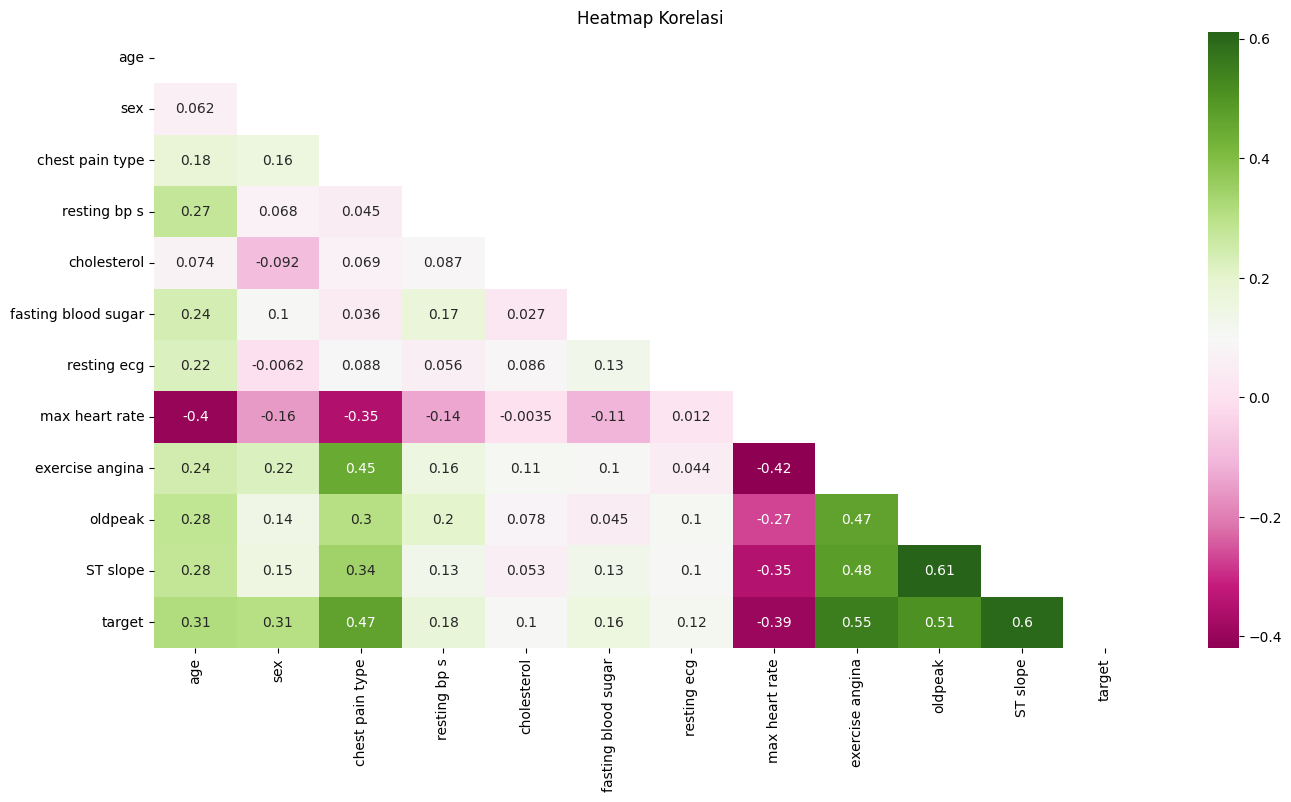

In [20]:
plt.figure(figsize=(16, 8))

# Menghitung matriks korelasi untuk fitur numerik
corr_matrix = df.corr(numeric_only=True)

# Membuat mask untuk bagian atas segitiga
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Membuat heatmap dengan anotasi
sns.heatmap(corr_matrix, cmap='PiYG', annot=True, mask=mask)

# Menambahkan judul untuk plot
plt.title('Heatmap Korelasi')

plt.show()

Berikut adalah penjelasan korelasi dalam heatmap di atas:

1. **Chest Pain (Nyeri Dada) dan Target**:  
   Terdapat korelasi positif yang cukup signifikan antara nyeri dada dan variabel target. Hal ini masuk akal, karena semakin tinggi tingkat nyeri dada (chest pain type), semakin besar risiko seseorang terkena penyakit jantung.

2. **Target**:  
   Variabel target memiliki korelasi positif yang tinggi dengan:
   - **ST Slope**: Indikator kemiringan segmen ST, yang menunjukkan hubungan erat dengan risiko penyakit jantung.
   - **Oldpeak**: Depresi segmen ST setelah olahraga, yang juga berkaitan erat dengan tingkat keparahan penyakit jantung.
   - **Exercise Angina**: Nyeri dada yang dipicu oleh aktivitas fisik, yang menunjukkan tanda risiko lebih tinggi terhadap penyakit jantung.

3. **Max Heart Rate (Detak Jantung Maksimum)**:  
   Variabel ini menunjukkan korelasi negatif dengan sebagian besar kolom, termasuk target. Ini berarti bahwa semakin rendah detak jantung maksimum, semakin besar risiko penyakit jantung.

4. **Resting ECG, Resting BP S, Fasting Blood Sugar, dan Cholesterol**:  
   Variabel-variabel ini memiliki korelasi yang rendah dengan kolom lainnya, termasuk target. Hal ini menunjukkan bahwa mereka memiliki hubungan yang lebih lemah dengan risiko penyakit jantung dibandingkan variabel lain yang lebih signifikan.

5. **Oldpeak dan ST Slope**:  
   Korelasi positif tertinggi ditemukan antara **Oldpeak** dan **ST Slope** (0,61). Hal ini menunjukkan hubungan yang cukup kuat antara kedua variabel ini, karena keduanya mengukur indikator yang terkait dengan fungsi jantung selama dan setelah aktivitas fisik.

## **Preprocessing**

#### Memisahkan fitur dan target:

In [21]:
# Tetapkan variabel X sebagai fitur dan y sebagai kolom target
X = df.drop('target', axis=1)
y = df['target']

X menyimpan semua kolom kecuali kolom target, yang merupakan fitur prediktor. Sedangkan y hanya menyimpan kolom target sebagai label target. Memisahkan data menjadi fitur (X) dan label (y) diperlukan untuk melatih model machine learning, di mana model belajar dari fitur untuk memprediksi target.

#### Scaling data:

In [22]:
sc= StandardScaler()
X = sc.fit_transform(X)

Penskalaan atau scaling fitur deskriptif sangat bermanfaat karena dapat mengubah nilai-nilai numerik agar berada dalam rentang yang konsisten di antara berbagai variabel. Salah satu teknik yang sering digunakan adalah StandardScaler, yang mengubah data menjadi distribusi dengan rata-rata 0 dan standar deviasi 1.

#### Menangani ketidakseimbangan data:

In [23]:
y.value_counts()

,count
target,
0,377
1,338


Terlihat bahwa kelas target(y) tidak seimbang, di mana jumlah "0" (Normal) lebih lebih besar dari jumlah "1" (Menderita penyakit jantung). Ketidakseimbangan data dapat membuat model bias terhadap kelas mayoritas (lebih sering memprediksi "0" dibandingkan "1"). Oversampling membantu mengatasi masalah ini dengan meningkatkan jumlah sampel kelas minoritas.

In [24]:
# oversampling
ros=RandomOverSampler(random_state=123)
X,y = ros.fit_resample(X,y)

print(y.value_counts())

target
0    377
1    377
Name: count, dtype: int64


RandomOverSampler dapat menambahkan sampel kelas minoritas untuk menyeimbangkan distribusi kelas di kolom target.

#### Membagi data:

In [25]:
# train test spliting
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size= 0.8, random_state=123)

Membagi data menjadi 80% untuk pelatihan (train) dan 20% untuk pengujian (test). Pembagian data memastikan bahwa model dilatih pada data latih dan dievaluasi pada data yang tidak terlihat (data uji). Hal ini penting dilakukan untuk mengukur kinerja model secara objektif.

## **Modeling**

#### **K-Nearest Neighbor Classifier**

In [26]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
print(classification_report(y_true= y_test, y_pred= y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85        69
           1       0.87      0.89      0.88        82

    accuracy                           0.87       151
   macro avg       0.87      0.87      0.87       151
weighted avg       0.87      0.87      0.87       151



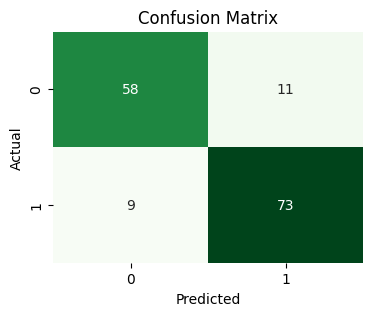

In [27]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### **Naive Bayes Classifier**

In [28]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
print(classification_report(y_true= y_test, y_pred= y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        69
           1       0.89      0.88      0.88        82

    accuracy                           0.87       151
   macro avg       0.87      0.87      0.87       151
weighted avg       0.87      0.87      0.87       151



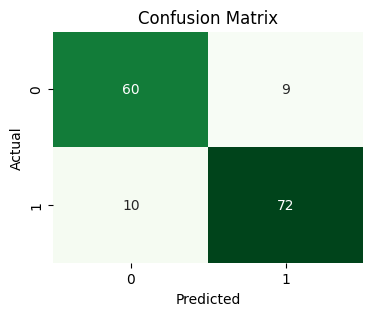

In [29]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### **Random Forest Classifier**

In [30]:
rf_model = RandomForestClassifier(criterion='gini',
                            max_features=2,
                            random_state=123,
                            n_jobs=-1,
                            n_estimators=500,
                            max_depth=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, max_features=2, n_estimators=500,
                       n_jobs=-1, random_state=123)

In [31]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_true= y_test, y_pred= y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        69
           1       0.93      0.90      0.91        82

    accuracy                           0.91       151
   macro avg       0.91      0.91      0.91       151
weighted avg       0.91      0.91      0.91       151



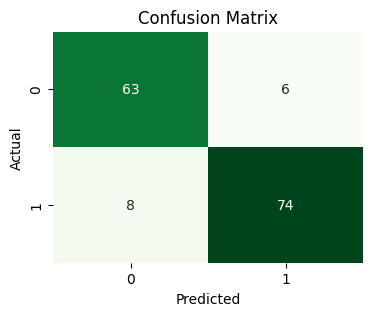

In [32]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## **Komparasi Model**

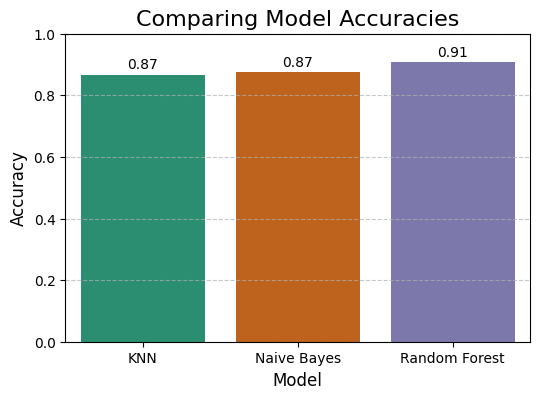

In [33]:
# Hitung akurasi untuk setiap model
knn_accuracy = accuracy_score(y_test, knn_model.predict(X_test))
nb_accuracy = accuracy_score(y_test, nb_model.predict(X_test))
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

# Data untuk plotting
model_names = ['KNN', 'Naive Bayes', 'Random Forest']
accuracies = [knn_accuracy, nb_accuracy, rf_accuracy]

# Membuat bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=model_names, y=accuracies, palette='Dark2')

# Menambahkan detail plot
plt.title('Comparing Model Accuracies', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 1)  # Akurasi biasanya berada di rentang 0 - 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan nilai akurasi pada setiap bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=10)

plt.show()

## **Random Forest Feature Importance**

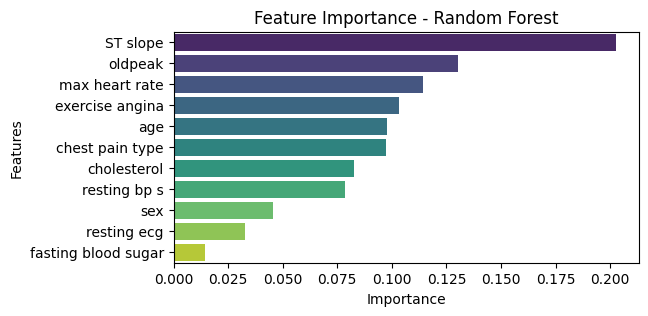

,Feature,Importance
10,ST slope,0.202884
9,oldpeak,0.130162
7,max heart rate,0.114478
8,exercise angina,0.103287
0,age,0.097915
2,chest pain type,0.097566
4,cholesterol,0.082837
3,resting bp s,0.078437
1,sex,0.045505
6,resting ecg,0.032739


In [34]:
# Feature Importance
importances = rf_model.feature_importances_

# Membuat dataframe untuk visualisasi
feature_names = df.drop('target', axis=1).columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualisasi Feature Importance
plt.figure(figsize=(6, 3))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Menampilkan fitur penting
importance_df

Feature Importance mempermudah interpretasi tentang fitur mana yang paling memengaruhi keputusan model, sehingga dapat digunakan untuk interpretasi bisnis atau optimalisasi lebih lanjut.